# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('base1.csv')
df['mau'] = df.mau.astype(int)
y = df.mau
x = df.drop('mau',axis=1)

In [29]:
"""y_treino = df_treino.mau
x_treino = df_treino.drop('mau',axis=1)

y_teste = df_teste.mau
x_teste = df_teste.drop('mau',axis=1)
y_treino.value_counts()"""

"y_treino = df_treino.mau\nx_treino = df_treino.drop('mau',axis=1)\n\ny_teste = df_teste.mau\nx_teste = df_teste.drop('mau',axis=1)\ny_treino.value_counts()"

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   idade                                   16650 non-null  int64
 1   tempo_emprego                           16650 non-null  int64
 2   possui_celular                          16650 non-null  int64
 3   possui_fone_comercial                   16650 non-null  int64
 4   possui_fone                             16650 non-null  int64
 5   possui_email                            16650 non-null  int64
 6   mau                                     16650 non-null  int32
 7   sexo_M                                  16650 non-null  int64
 8   posse_de_veiculo_Y                      16650 non-null  int64
 9   posse_de_imovel_Y                       16650 non-null  int64
 10  qtd_filhos_1                            16650 non-null  int64
 11  qtd_filhos_2   

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [31]:
clf = DecisionTreeClassifier(random_state=123)
clf

DecisionTreeClassifier(random_state=123)

In [32]:
clf = clf.fit(x, y)
clf

DecisionTreeClassifier(random_state=123)

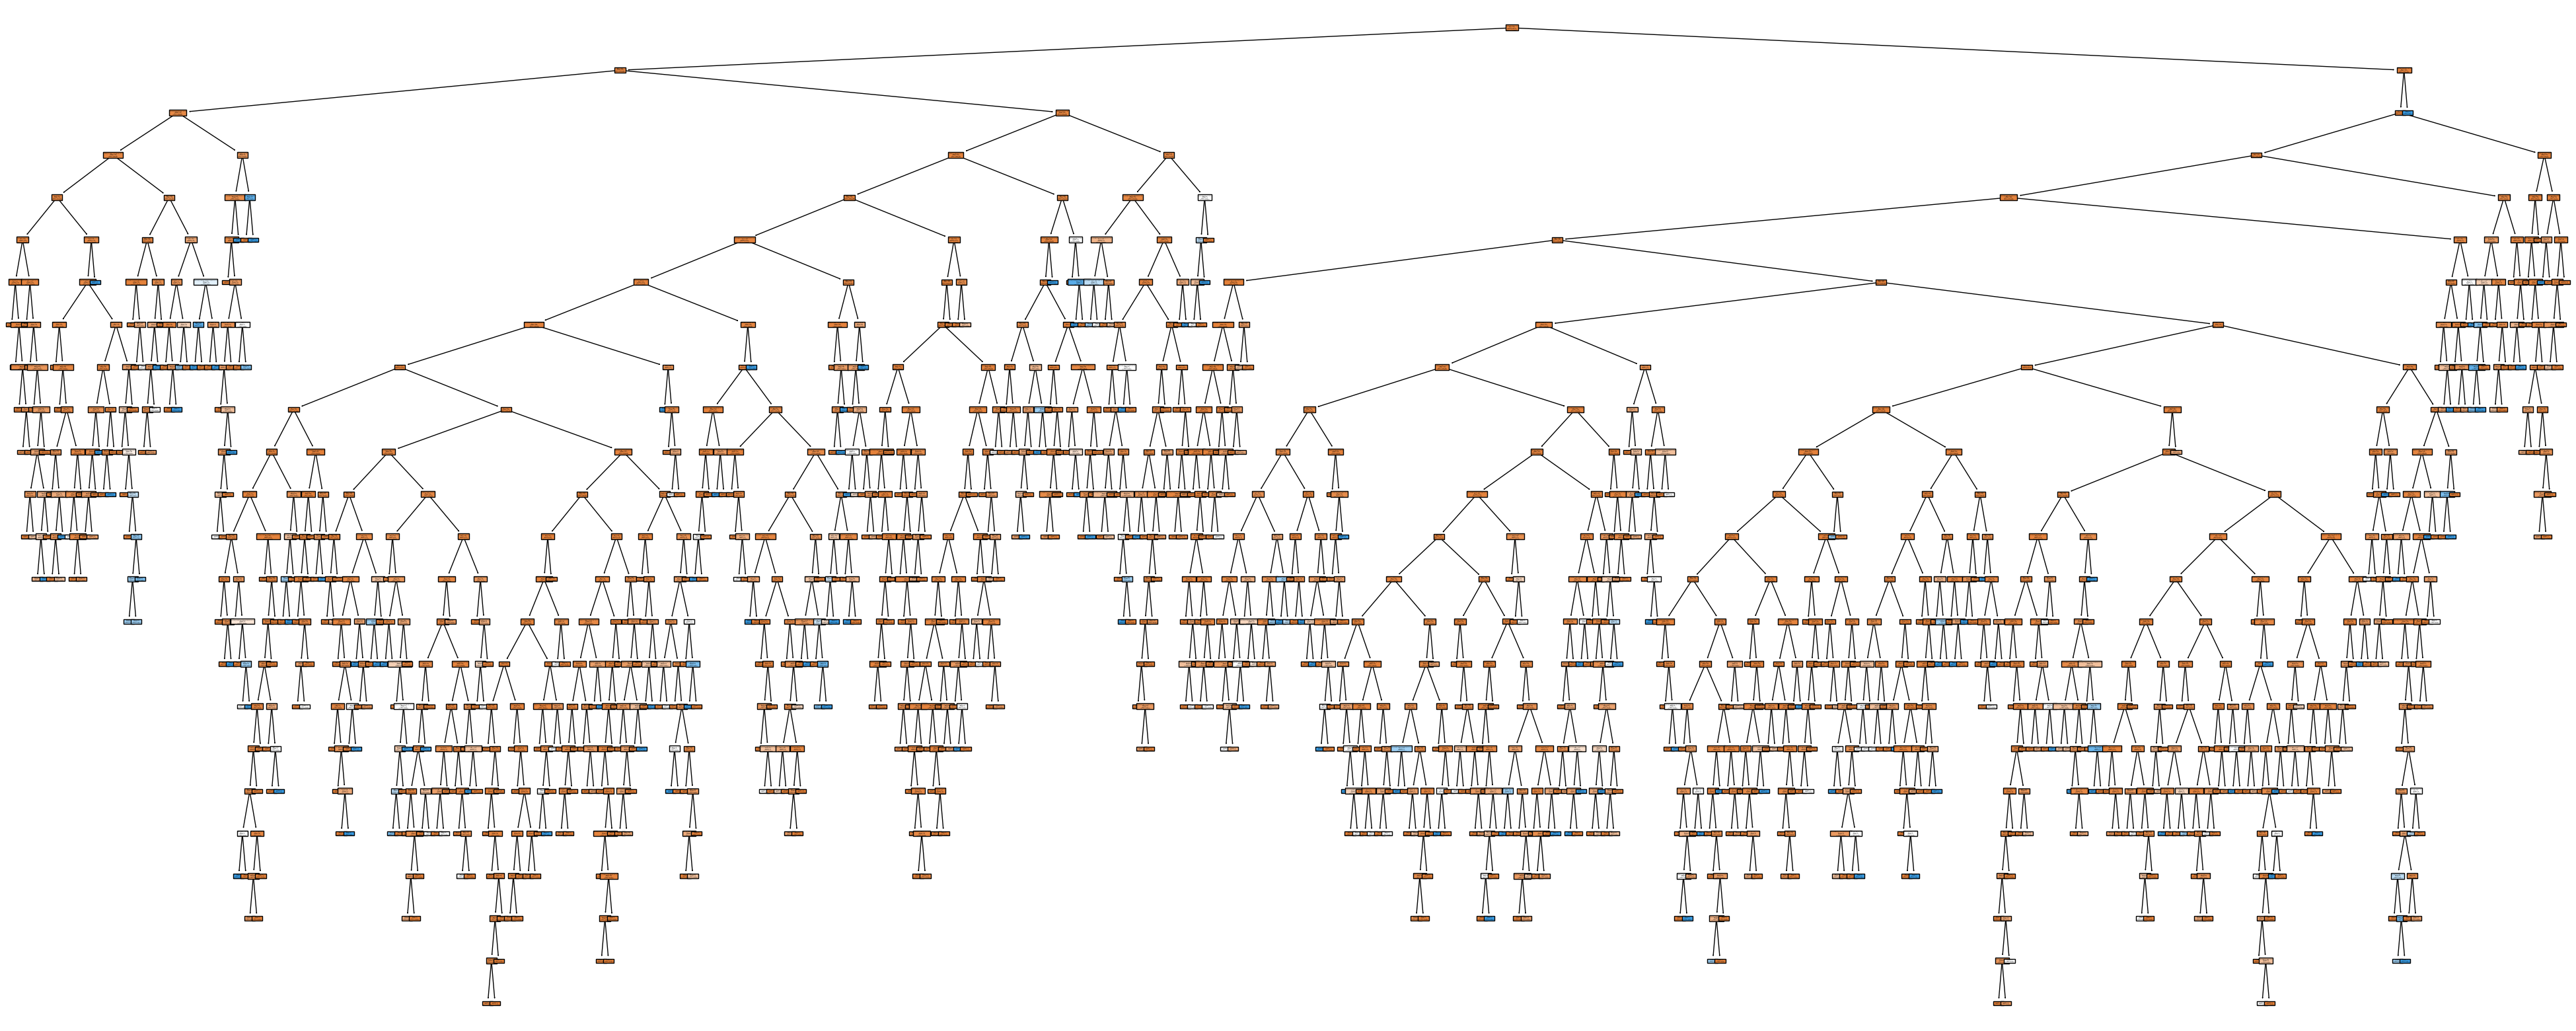

In [33]:
plt.figure(figsize=(50, 20))
plot_tree(clf,
          filled=True,
          class_names=['Bom Pagador', 'Mau Pagador'],
          feature_names=x.columns.tolist())
plt.show()

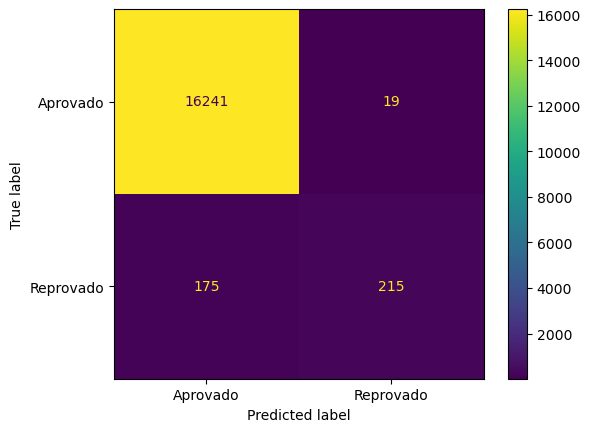

In [34]:
ConfusionMatrixDisplay.from_estimator(clf, x ,y, display_labels=['Aprovado', 'Reprovado']);



In [35]:
y_predict = clf.predict(x)
acuracia_treino = accuracy_score(y, y_predict)
acuracia_treino

0.9883483483483484

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=123)

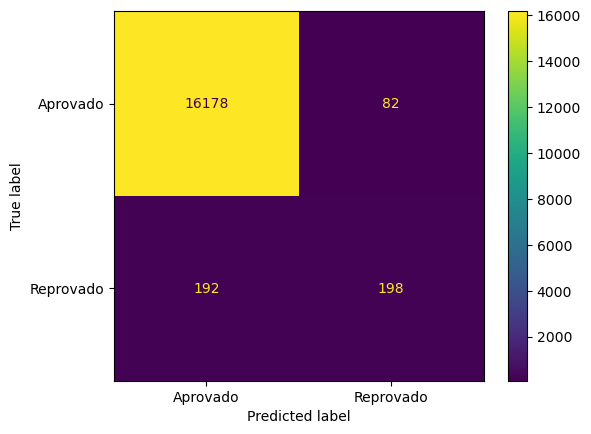

In [37]:
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(x_train,y_train)
ConfusionMatrixDisplay.from_estimator(clf, x ,y, display_labels=['Aprovado', 'Reprovado']);
plt.show()

In [38]:
predict = clf.predict(x)
acuracia_teste = accuracy_score(y, predict)
acuracia_teste

0.9835435435435436

In [39]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(x_treino, y_treino)
predict = clf.predict(x_teste)
accuracy_score(y_teste, predict)

0.9751751751751752

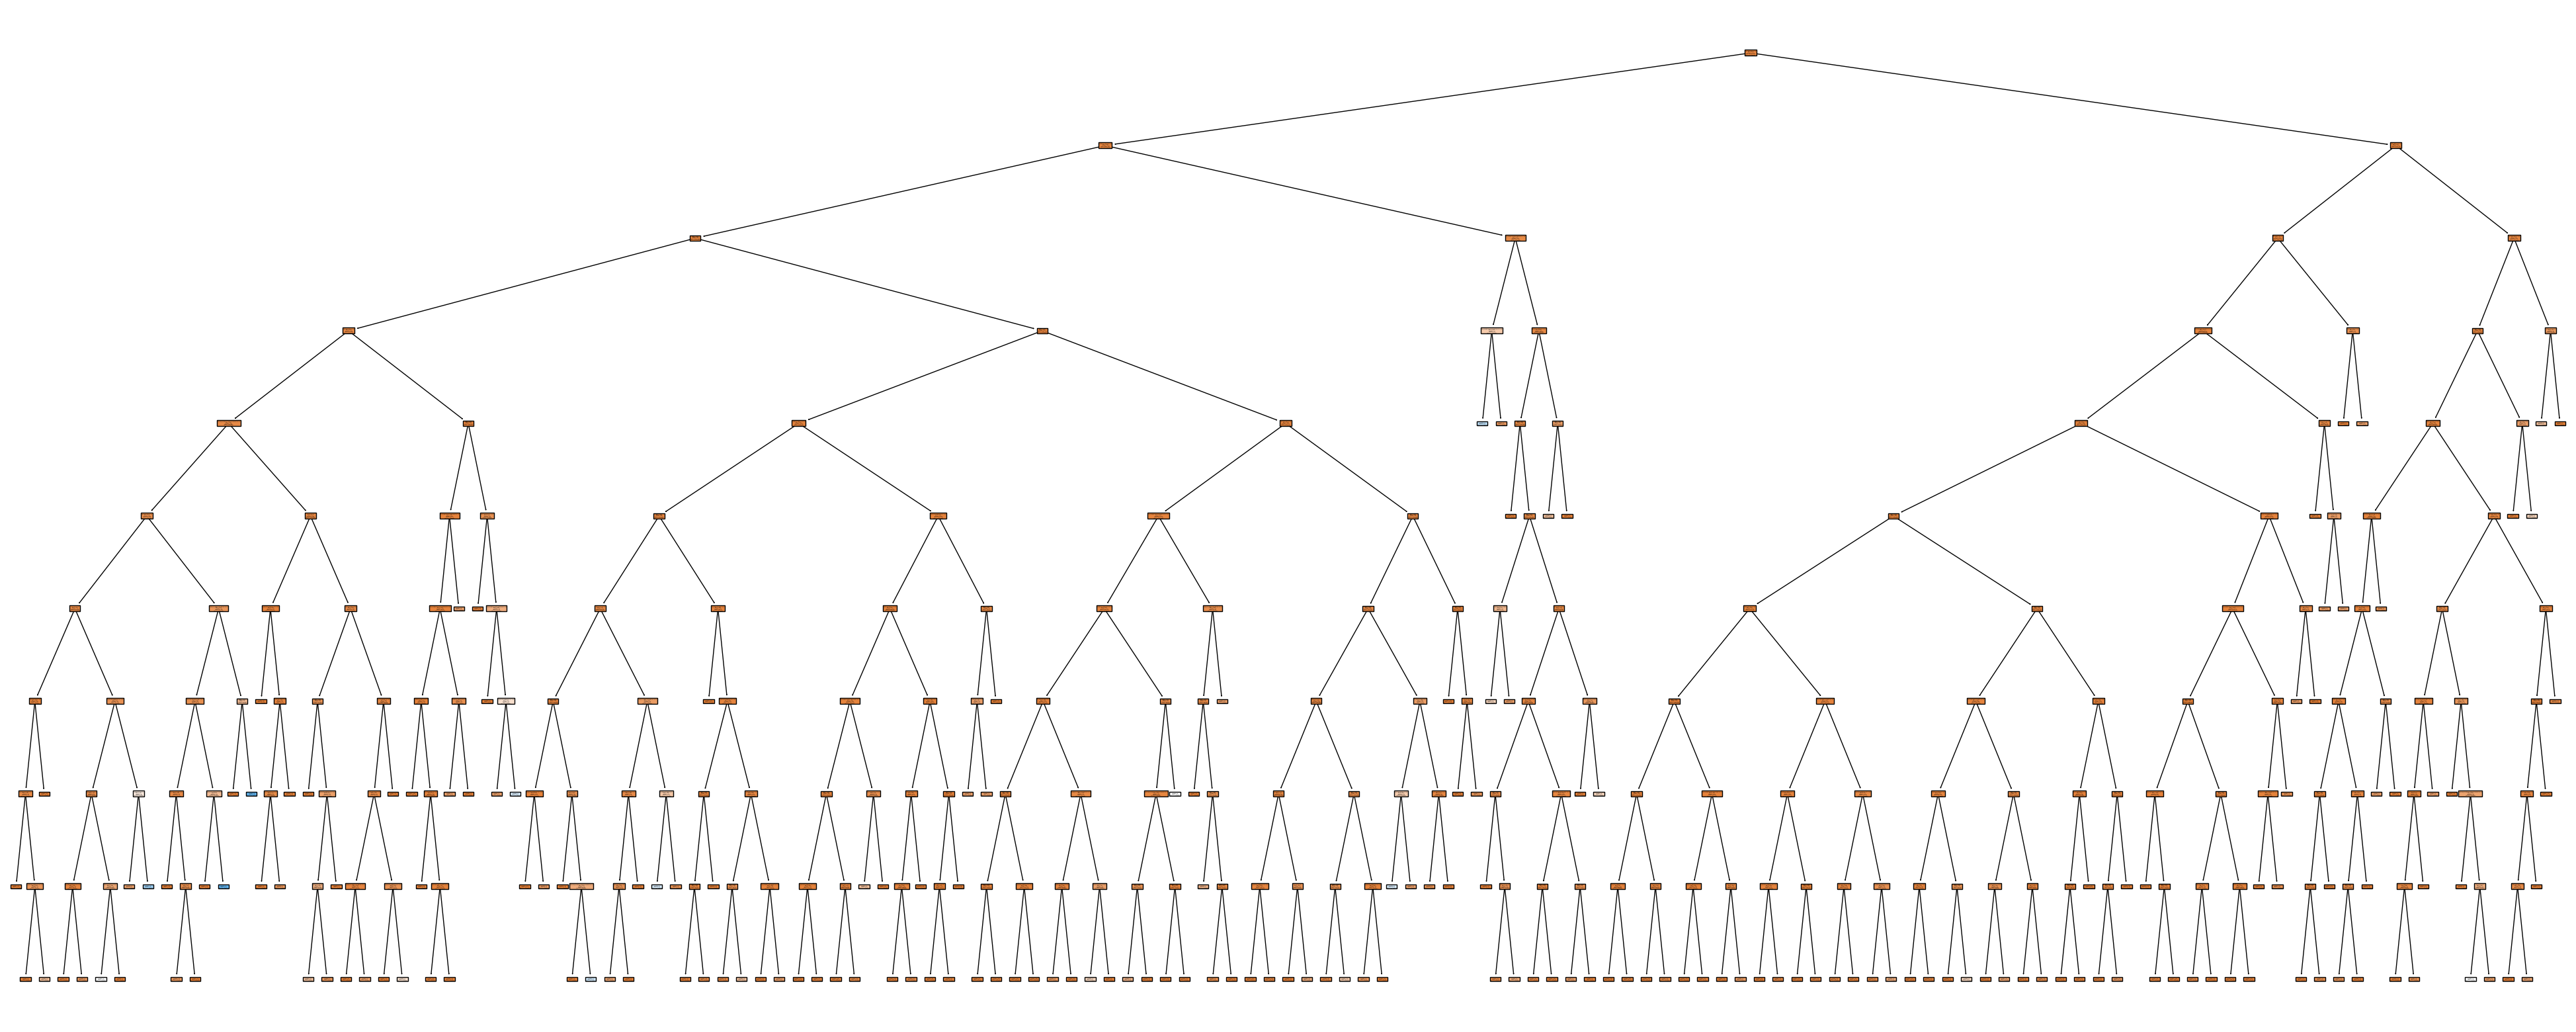

In [40]:
plt.figure(figsize=(50, 20))
plot_tree(clf,
          filled=True,
          class_names=['Bom Pagador', 'Mau Pagador'],
          feature_names=x.columns.tolist())
plt.show()

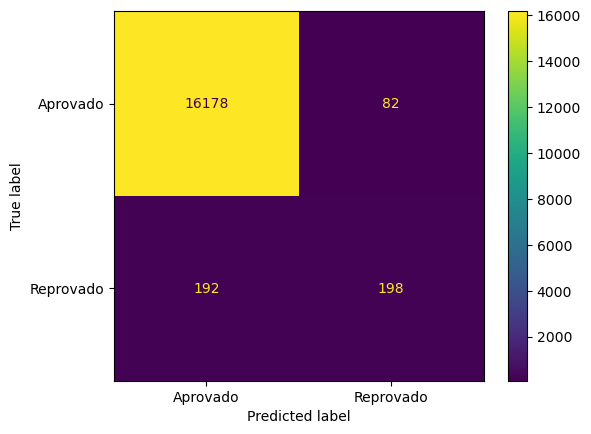

In [41]:
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(x_train,y_train)
ConfusionMatrixDisplay.from_estimator(clf, x ,y, display_labels=['Aprovado', 'Reprovado']);
plt.show()

In [46]:
y_pred = clf.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)
proporcao_reprovados = cm[1, 1] / sum(cm[1, :])

proporcao_reprovados

0.2564102564102564

In [48]:
todos_bons = [0] * len(y_test)

acuracia_todos_bons = accuracy_score(y_test, todos_bons)
acuracia_todos_bons

0.9765765765765766